#Data preprocessing

In [34]:
import pandas as pd

df = pd.read_csv("train.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dropping unecessary columns

In [36]:
columns_to_drop = ["Cabin", "Ticket", "Name", "PassengerId"]

df.drop(columns=columns_to_drop, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Filling null values

In [37]:
df["Age"].fillna(df["Age"].mean())
df["Embarked"].fillna(df["Embarked"].mode().iloc[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["Embarked"] = label_encoder.fit_transform(df["Embarked"])
df["Sex"] = label_encoder.fit_transform(df["Sex"])

In [39]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [40]:
for column in df.columns:
  print(df[column].value_counts())
  print("-"*15)

0    549
1    342
Name: Survived, dtype: int64
---------------
3    491
1    216
2    184
Name: Pclass, dtype: int64
---------------
1    577
0    314
Name: Sex, dtype: int64
---------------
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
---------------
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
---------------
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
---------------
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
---------------
2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64
---------------


In [41]:
df["Age"].fillna(0,inplace=True)
df["Age"].replace(0, df["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    23.799293
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

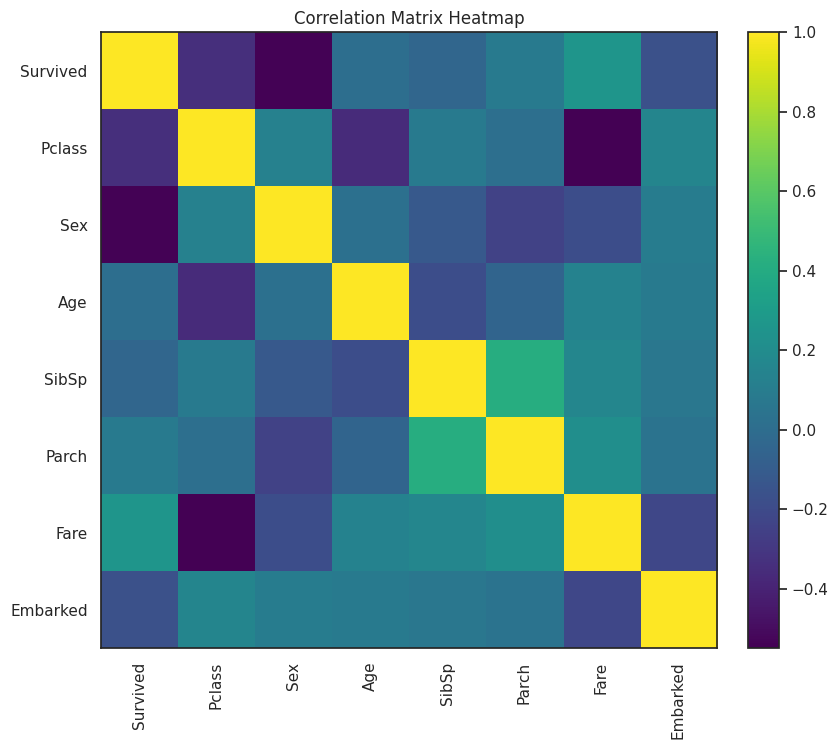

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
heatmap = plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(heatmap, fraction=0.046, pad=0.04)  # Add a colorbar for reference
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

#PCA analysis

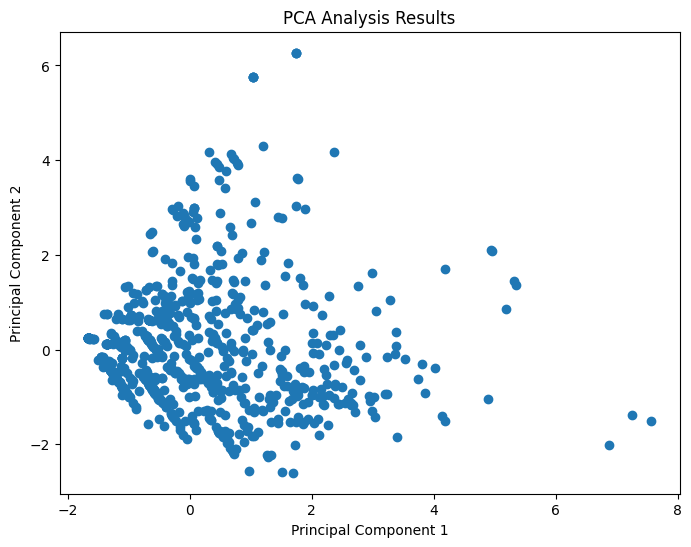

In [44]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA with the desired number of components (let's say 2 for illustration)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA Analysis Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


#ML model

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=3)


knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 72.07%


After PCA accuracy

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_standardized)


X_test_standardized = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_standardized)

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_pca, y_train, test_size=0.2, random_state=42)

from sklearn.metrics import accuracy_score

knn_model.fit(X_train_final, y_train_final)

y_pred = knn_model.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on PCA-transformed test data: {accuracy*100:.2f}%')


Accuracy on PCA-transformed test data: 78.77


#Accuracy


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate and print recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate and print F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.72
Precision: 0.66
Recall: 0.64
F1 Score: 0.65
Confusion Matrix:
[[81 24]
 [27 47]]


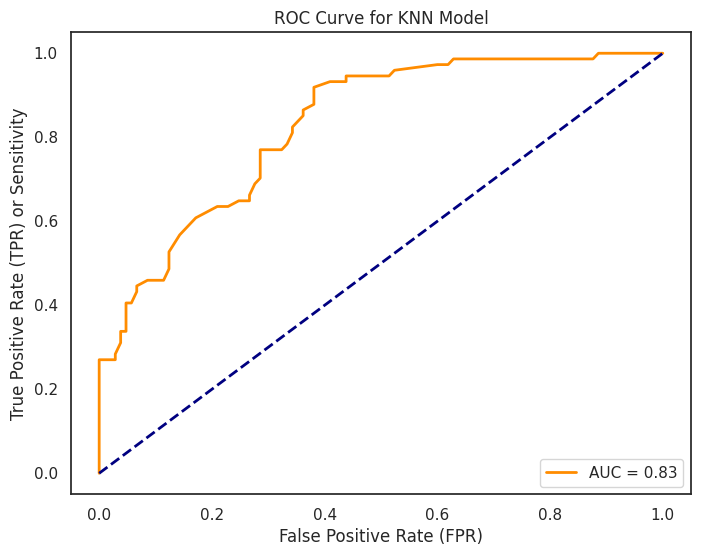

In [55]:
from sklearn.metrics import roc_curve, auc

y_probs = knn_model.predict_proba(X_test_pca)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_probs)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Sensitivity')
plt.title('ROC Curve for KNN Model')
plt.legend(loc='lower right')
plt.show()


#Optimizing number of neighbours


In [48]:
for i in range(1, 101):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(X_train_final, y_train_final)

  y_pred = knn_model.predict(X_test_pca)


  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy on PCA-transformed test data for neighbours number:{i}: {accuracy*100:.2f}%')

Accuracy on PCA-transformed test data for neighbours number:1: 76.54%
Accuracy on PCA-transformed test data for neighbours number:2: 77.65%
Accuracy on PCA-transformed test data for neighbours number:3: 78.77%
Accuracy on PCA-transformed test data for neighbours number:4: 79.33%
Accuracy on PCA-transformed test data for neighbours number:5: 81.01%
Accuracy on PCA-transformed test data for neighbours number:6: 79.89%
Accuracy on PCA-transformed test data for neighbours number:7: 79.89%
Accuracy on PCA-transformed test data for neighbours number:8: 79.33%
Accuracy on PCA-transformed test data for neighbours number:9: 81.01%
Accuracy on PCA-transformed test data for neighbours number:10: 79.33%
Accuracy on PCA-transformed test data for neighbours number:11: 79.89%
Accuracy on PCA-transformed test data for neighbours number:12: 81.01%
Accuracy on PCA-transformed test data for neighbours number:13: 81.01%
Accuracy on PCA-transformed test data for neighbours number:14: 81.56%
Accuracy on PCA